# k-NN project: Iris Classification

This data is from `sklearn.datasets`. This dataset consists of 3 different types of irises' petal / sepal length / width, stored in a $150\times4$ `numpy.ndarray`. We already explored the dataset briefly in the previous chapter. This time we will try to use the feature provided to predict the type of the irises. For the purpose of plotting, we will only use the first two features: `sepal length` and `sepal width`.

We first load the dataset. 


In [36]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

Then we would like to split the dataset into trainning data and test data. Here we are going to use `sklearn.model_selection.train_test_split` function. Besides the dataset, we should also provide the propotion of the test set comparing to the whole dataset. We will choose `0.1` here, which means that the size of the test set is 0.1 times the size of the whole dataset. 

The split will be randomly. You may set the argument `random_state` to be a certain number to control the random process. If you set a `random_state`, the result of the random process will stay the same. This is for reproducible output across multiple function calls.

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Before we start to play with k-NN, let us look at the data first. Since we only choose two features, it is able to plot these data points on a 2D plane, with different colors representing different classes. 


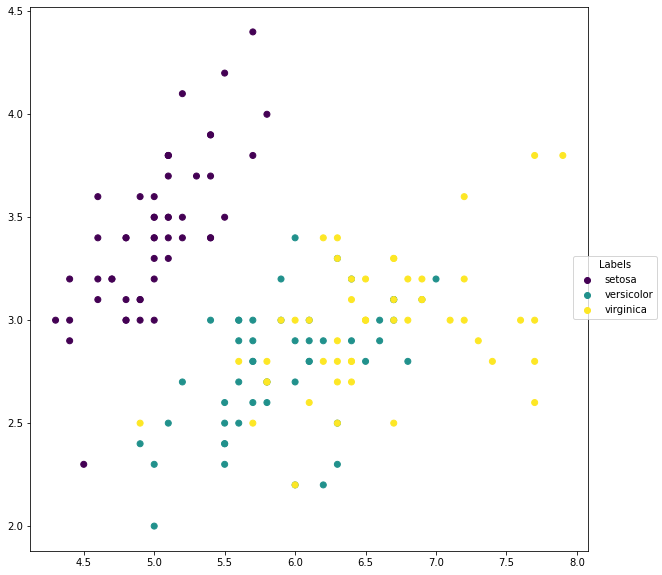

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the scatter plot.
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X[:, 0], X[:, 1], c=y)

# Generate legends.
labels = ['setosa', 'versicolor', 'virginica']
fig.legend(handles=scatter.legend_elements()[0], labels=labels,
           loc="right", title="Labels")

plt.show()

Now let us apply k-NN to this dataset. We first use our codes. Here I use `from assests.codes.knn` to import our functions since I put all our functions in `./assests/codes/knn.py`. Then the poential code is 
```python
y_pred = classify_kNN(X_test, X_train, y_train, k=10)
```

Note that the above code is actually wrong. The issue ist that our function `classify_kNN` can only classify one row of data. To classify many rows, we need to use a `for` loop. 


In [45]:
from assests.codes.knn import classify_kNN

y_pred = list()
for row in X_test:
    row_pred = classify_kNN(row, X_train, y_train, k=10)
    y_pred.append(row_pred)
y_pred = np.array(y_pred)

We could use list comprehension to simply the above codes. 

In [46]:
from assests.codes.knn import classify_kNN

y_pred = np.array([classify_kNN(row, X_train, y_train, k=10) for row in X_test])

This `y_pred` is the result we got for the test set. We may compare it with the real answer `y_test`, can calcuate our accuracy. Here we use list comprehension again to find all datapoints that are classified correctly.

In [53]:
cor = [data for data in y_test-y_pred if data==0]
acc = len(cor) / len(y_test)
print(acc)

0.8


The data consists of 80.0% observations. Bla, Bla, ....

80%.

In [54]:
from IPython.display import Markdown as md
md("From the result shown above, we know that our classifier has a tested accuracy {}%.".format(acc*100))


From the result shown above, we know that our classifier has a tested accuracy 80.0%.

In [49]:
y_test

array([0, 2, 1, 0, 2, 1, 2, 1, 2, 0, 0, 2, 2, 0, 1])

In [57]:
import tensorflow as tf
# import keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

X_test = X_test[1000:1200, :]
y_test = y_test[1000:1200]



In [58]:
X_train_norm, parameters = myknn.encodeNorm(X_train)
X_test_norm, _ = myknn.encodeNorm(X_test, parameters=parameters)

In [61]:
n_neighbors = 10

X_train_norm, parameters = myknn.encodeNorm(X_train)
X_test_norm, _ = myknn.encodeNorm(X_test, parameters=parameters)

clf = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform", metric="euclidean",
                                     algorithm='brute')
clf.fit(X_train_norm, y_train)

y_p = clf.predict(X_test_norm)


resb = [item for item in y_p-y_test if item!=0]
print(len(resb))
print(len(resb)/len(y_p))



10
0.05


In [60]:
y_m = np.array([myknn.classify_kNN(item, X_train_norm, y_train, k=n_neighbors) for item in tqdm(X_test_norm)])



res = [item for item in y_p-y_m if item!=0]
print(len(res))
print(len(res)/len(y_p))

100%|██████████| 200/200 [01:04<00:00,  3.10it/s]

3
0.015


In [62]:
res = [item for item in y_p-y_m if item!=0]
print(len(res))
print(len(res)/len(y_p))

3
0.015


In [32]:
d = y_p-y_m
print(y_m[33])
print(y_p[33])
print(y_test[33])

4
0
4


In [33]:
res = [item for item in y_test-y_m if item!=0]
print(len(res))
print(len(res)/len(y_p))

318
0.0318


In [44]:
y_h = np.array([hiknn.classify0(item, X_train_norm, y_train, k=n_neighbors) for item in tqdm(X_test_norm)])


res = [item for item in y_h-y_m if item!=0]
print(len(res))
print(len(res)/len(y_p))

100%|██████████| 15/15 [00:00<00:00, 12863.33it/s]

0
0.0


In [46]:
# idxpm = np.nonzero(y_p-y_m)
idx = np.nonzero(y_test - y_m)

# idx = np.intersect1d(idxpm, idxmd)

idx[0]

array([13, 14], dtype=int64)

In [47]:
ii = 0
pic1 = X_test[idx[ii]].reshape((28, 28))
plt.imshow(pic1)

print((y_test[idx[ii]], y_p[idx[ii]], y_m[idx[ii]], y_h[idx[ii]]))

ValueError: cannot reshape array of size 4 into shape (28,28)

In [71]:
n_neighbors = 15
for weights in ["uniform"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    # _, ax = plt.subplots()
    disp = DecisionBoundaryDisplay.from_estimator(
        clf, 
        X,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        # shading="auto",
        alpha=0.5
    )
    disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
    # Plot also the training points
    # plt.scatter(
    #     x=X[:, 0],
    #     y=X[:, 1],
    #     s=newy,
    #     cmap='rgb',
    #     # alpha=1.0,
    #     # edgecolor="black",
    # )
    # # plt.title(
    #     "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    # )


ValueError: X has 2 features, but KNeighborsClassifier is expecting 3 features as input.

In [5]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [21]:
ma = {'setosa': 1, 'versicolor': 100, 'virginica': 200}

In [4]:
a = np.array([1,2,3,5])
b = np.array([2,1,5,3])

In [6]:
np.greater(a, b)

array([False,  True, False,  True])

In [9]:
np.maximum(a,np.ones(a.size))

array([1., 2., 3., 5.])

In [10]:
np.ones(a.size)

array([1., 1., 1., 1.])